# 결측데이터 (Missing Value)
참조 : http://statkclee.github.io/data-science/ds-missing.html

<img src="photo/1.PNG">

# 결측값 식별과 현황파악 
 - mlbench 보스톤 주택가격 데이터셋을 기본으로 결측값 관련 학습 내용에 대한 실습을 진행한다.

In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(mlbench)
data("BostonHousing")

Warning message:
: package 'mlbench' was built under R version 3.3.2

 - 원본 데이터 나중에 복구하기 위해 잠시 'original' DF로 저장

In [3]:
original <- BostonHousing

In [4]:
head(BostonHousing,3) # ptratio 범주형, rad 범주형

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


 - NA 값으로 변환 : 결측치를 주기 위해서 

In [5]:
BostonHousing[sample(1:nrow(BostonHousing), 40), "ptratio"] <- NA
BostonHousing[sample(1:nrow(BostonHousing), 40), "rad"] <- NA

### 2.1. 결측값 현황 파악

apply 계열 함수를 사용해서 변수별, 관측점별 결측값이 얼마나 포함되어 있는지 파악한다. check_missing_value() 함수를 활용하여 변수별, 관측점별 결측값 백분율을 계산한다. 만약 5%이상 관측점 혹은 변수에 결측값이 포함되어 있으면 변수를 버리거나 혹은 관측점을 제거하는 전략을 택할 수도 있다.


In [6]:
head(BostonHousing[is.na(BostonHousing$rad),],3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
13,0.09378,12.5,7.87,0,0.524,5.889,39,5.4509,NA,311,15.2,390.5,15.71,21.7
20,0.7258,0,8.14,0,0.538,5.727,69.5,3.7965,NA,307,21,390.95,11.28,18.2
40,0.02763,75,2.95,0,0.428,6.595,21.8,5.4011,NA,252,18.3,395.63,4.32,30.8


 - Missing Value가 있는 Column의 정보를 Missvalue를 제외한 부분에서의 퍼센트

In [7]:
check_missing_value <- function(x){sum(is.na(x))/length(x)*100}
t(apply(BostonHousing, 2, check_missing_value))

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.905138,0.000000,7.905138,0.000000,0.000000,0.000000


In [8]:
apply(BostonHousing, 1, check_missing_value) %>% head(20) %>% t()

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857,7.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857


## 2.2. mice, VIM 팩키지

mice 팩키지를 사용해서 md.pattern 함수를 사용해서 “ptratio” 변수에 40개 주입한 NA 결측값을 확인해본다.

In [9]:
suppressWarnings(suppressMessages(library(mice)))
md.pattern(BostonHousing)

,crim,zn,indus,chas,nox,rm,age,dis,tax,b,lstat,medv,rad,ptratio,
428,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
38,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
38,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,0,0,0,0,0,0,40,40,80


혹은 VIM 팩키지를 활용하여 결측값을 시각화하는 것도 좋다. 결측값은 빨강색(red)로 설정하여 각변수별로 결측값에 대한 현황을 파악하기 쉽게 도식화했다.

In [14]:
library(VIM)


 Variables sorted by number of missings: 
 Variable      Count
      rad 0.07905138
  ptratio 0.07905138
     crim 0.00000000
       zn 0.00000000
    indus 0.00000000
     chas 0.00000000
      nox 0.00000000
       rm 0.00000000
      age 0.00000000
      dis 0.00000000
      tax 0.00000000
        b 0.00000000
    lstat 0.00000000
     medv 0.00000000


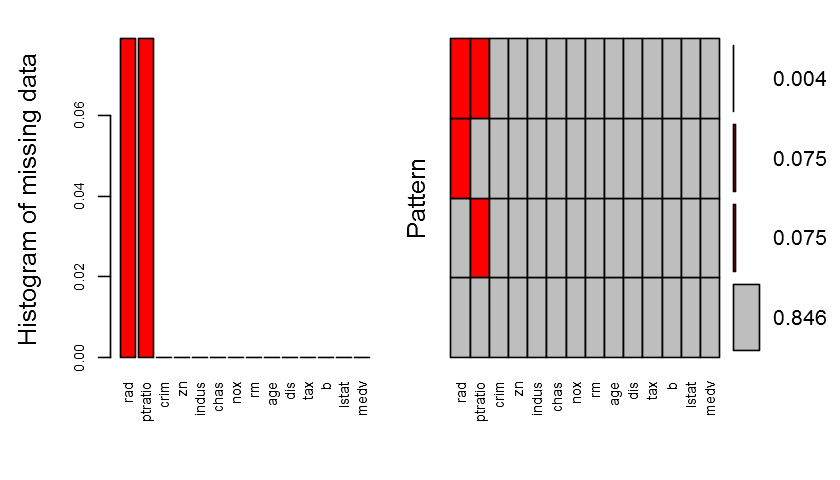

In [11]:
options(repr.plot.height=4)
aggr_plot <- aggr(BostonHousing, col=c('gray','red'), numbers=TRUE, 
    sortVars=TRUE, labels=names(BostonHousing), cex.axis=.7, gap=3, ylab=c("Histogram of missing data", "Pattern"))

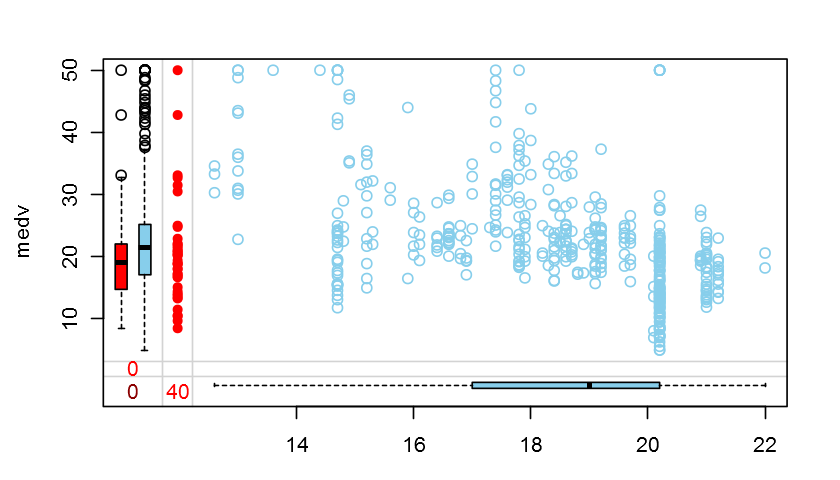

In [12]:
marginplot(BostonHousing[, c('ptratio','medv')])

marginplot(BostonHousing[, c('ptratio','medv')]) 그래프를 통해 변수 2개만 가능하지만, 결측값이 포함된 경우와 결측값이 없는 경우를 비교해 볼 수도 있다.

# 3. 결측값 처리 전략

결측값 처리 전략은 다음과 같은 4가지 전략이 존재한다.

1. 관측점 제거
 - 데이터가 상당히 많은 경우, 동시에 모집단을 대표하는데 무리가 없는 경우 na.action=na.omit 설정을 적용한다.
 - lm(medv ~ ptratio + rad, data=BostonHousing, na.action=na.omit)
2. 변수 제거
 - 특정 변수에 상당한 값이 결측값인 경우, 다른 변수가 결측값을 많이 갖는 변수에 상응하는 정보량을 갖는 경우 제거한다.
3. 평균/중위수/최빈값으로 대체(impute)
 - 결측값을 변수가 연속형 숫자형인 경우 평균/중위수로 대체하고, 범주형 요인형인 경우 최빈값으로 대체한다.
4. 예측값으로 대체한다.

In [28]:
library(survival)
library(Hmisc)
library(DMwR)
library(dplyr)
library(rpart)

 - 평균으로 대체 
 - 중위수로 대체
 - 특정 값으로 대체 

In [18]:
impute(BostonHousing$ptratio, mean) %>% head %>% t()
impute(BostonHousing$ptratio, median) %>% head %>% t()
impute(BostonHousing$ptratio, 20) %>% head %>% t()

1,2,3,4,5,6
15.3,17.8,17.8,18.7,18.7,18.7


1,2,3,4,5,6
15.3,17.8,17.8,18.7,18.7,18.7


1,2,3,4,5,6
15.3,17.8,17.8,18.7,18.7,18.7


 - 혹은 팩키지를 사용하지 않고 직접 코드를 작성해서 작업 

In [19]:
BostonHousing$ptratio[is.na(BostonHousing$ptratio)] <- mean(BostonHousing$ptratio, na.rm = T) 

### 예측값으로 대체. 
 - DMwR 팩키지 knnImputation() 함수를 사용해서 k-nn (k-인접 군집분석)을 사용한다. k-nn 대체법은 인접한 최대 k 관측점 유클리드 거리를 계산하여 가장 근접된 값으로 대체한다.

In [20]:
data(BostonHousing)
BostonHousing[sample(1:nrow(BostonHousing), 40), "ptratio"] <- NA

knnOutput <- knnImputation(BostonHousing[, !names(BostonHousing) %in% "medv"]) 

In [23]:
head(BostonHousing[is.na(BostonHousing$ptratio),],3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
21,1.25179,0,8.14,0,0.538,5.57,98.1,3.7979,4,307,NA,376.57,21.02,13.6
49,0.25387,0,6.91,0,0.448,5.399,95.3,5.87,3,233,NA,396.9,30.81,14.4
62,0.17171,25,5.13,0,0.453,5.966,93.4,6.8185,8,284,NA,378.08,14.44,16


In [24]:
head(knnOutput[c(12,49,62),])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27
49,0.25387,0,6.91,0,0.448,5.399,95.3,5.87,3,233,17.9177939554711,396.9,30.81
62,0.17171,25,5.13,0,0.453,5.966,93.4,6.8185,8,284,17.2083783669814,378.08,14.44


 - 효과 분석

In [26]:
actuals <- original$ptratio[is.na(BostonHousing$ptratio)]
predicteds <- knnOutput[is.na(BostonHousing$ptratio), "ptratio"]
regr.eval(actuals, predicteds)

mae       mse      rmse      mape 
0.7403486 1.2320908 1.1099959 0.0419964

 - knn 대체 기법은 범주형 자료의 경우 적용에 한계가 있다. 이런 경우 rpart, mice 팩키지를 활용한다.
 - 먼저, rpart를 사용하는 경우 연속형 변수, 범주형 변수 모두 의사결정나무 모형을 순차적으로 적합시킨다.

In [30]:
data(BostonHousing)
BostonHousing[sample(1:nrow(BostonHousing), 40), "ptratio"] <- NA
BostonHousing[sample(1:nrow(BostonHousing), 40), "rad"] <- NA

class_mod <- rpart(rad ~ . - medv, data=BostonHousing[!is.na(BostonHousing$rad), ], method="class", na.action=na.omit)  # rad 변수가 범주형
anova_mod <- rpart(ptratio ~ . - medv, data=BostonHousing[!is.na(BostonHousing$ptratio), ], method="anova", na.action=na.omit)  # ptratio 변수는 숫자형
rad_pred <- predict(class_mod, BostonHousing[is.na(BostonHousing$rad), ])
ptratio_pred <- predict(anova_mod, BostonHousing[is.na(BostonHousing$ptratio), ])   

 - mice를 사용하는 경우: mice() 함수를 사용해서 먼저 모형을 생성시키고 나서, complete() 함수를 사용해서 결측값을 채워넣는 2단계 과정을 거침.

In [31]:
data(BostonHousing)
BostonHousing[sample(1:nrow(BostonHousing), 40), "ptratio"] <- NA
miceMod <- mice(BostonHousing[, !names(BostonHousing) %in% "medv"], method="rf")  # 확률숲(random forest)


 iter imp variable
  1   1  ptratio
  1   2  ptratio
  1   3  ptratio
  1   4  ptratio
  1   5  ptratio
  2   1  ptratio
  2   2  ptratio
  2   3  ptratio
  2   4  ptratio
  2   5  ptratio
  3   1  ptratio
  3   2  ptratio
  3   3  ptratio
  3   4  ptratio
  3   5  ptratio
  4   1  ptratio
  4   2  ptratio
  4   3  ptratio
  4   4  ptratio
  4   5  ptratio
  5   1  ptratio
  5   2  ptratio
  5   3  ptratio
  5   4  ptratio
  5   5  ptratio


In [32]:
miceOutput <- complete(miceMod)  # 생성된 데이터를 채워 넣음.
anyNA(miceOutput)    

[1] FALSE

# 4. 결측값 처리 방법에 따른 성능 평가

## 4.1. 결측값 처리 방법에 따른 성능 평가 – 연속형 변수 ptratio

다양한 결측값 처리 방법에 따른 성능 차이를 비교하는 것이 왜 고급 결측값 처리 방법을 활용해야 하는 근거도 된다.

먼저, 연속형 변수의 경우 다양한 결측값 처리 방법에 따른 성능의 차이를 비교해보자. “ptratio” 변수는 연속형 변수로 506개 변수중 50개 즉 10%를 결측값, NA로 치환한다.

평균과 중위수를 결측값 10%를 채워넣을 경우 중위수를 채워넣은 것이 mape를 봤을 때 대동소이하다.

In [33]:
data(BostonHousing)
original <- BostonHousing
BostonHousing[sample(1:nrow(BostonHousing), 50), "ptratio"] <- NA

actuals_ptratio <- original$ptratio[is.na(BostonHousing$ptratio)]
ptratios_mean_pred <- rep(mean(BostonHousing$ptratio, na.rm=T), length(actuals_ptratio))
ptratios_median_pred <- rep(median(BostonHousing$ptratio, na.rm=T), length(actuals_ptratio))
regr.eval(actuals_ptratio, ptratios_mean_pred)

mae        mse       rmse       mape 
1.64936842 4.25827916 2.06355983 0.09413871

In [34]:
regr.eval(actuals_ptratio, ptratios_median_pred)

mae       mse      rmse      mape 
1.6500000 4.4690000 2.1140009 0.0975145

 - 두번째 knn 기법을 활용한 경우 mape가 줄어든 것이 확인된다.

In [35]:
ptratios_knn_pred <- knnOutput[is.na(BostonHousing$ptratio), "ptratio"]
regr.eval(actuals_ptratio, ptratios_knn_pred)

mae         mse        rmse        mape 
0.063205066 0.104297692 0.322951532 0.003867273

 - 세번째 rpart 기법을 활용한 경우 mape가 줄어든 것이 확인된다.

In [36]:
ptratios_anova_mod <- rpart(ptratio ~ . - medv, 
    data=BostonHousing[!is.na(BostonHousing$ptratio), ], method="anova", na.action=na.omit)
ptratio_anova_pred <- predict(ptratios_anova_mod, BostonHousing[is.na(BostonHousing$ptratio), ])
regr.eval(actuals, ptratio_anova_pred)

Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In (trues - preds)/trues: 두 객체의 길이가 서로 배수관계에 있지 않습니다

mae       mse      rmse      mape 
2.2233245 6.7905062 2.6058600 0.1292258

 - 네번째는 rf 확률숲 모형을 적용하는데 결측값 처리 전용 mice 팩키지를 활용한다. mape 값이 하향된 것이 관측된다.

In [39]:
mice_mod <- mice(BostonHousing[, !names(BostonHousing) %in% "medv"], method="rf") # 1단계 모형 생성


 iter imp variable
  1   1  ptratio
  1   2  ptratio
  1   3  ptratio
  1   4  ptratio
  1   5  ptratio
  2   1  ptratio
  2   2  ptratio
  2   3  ptratio
  2   4  ptratio
  2   5  ptratio
  3   1  ptratio
  3   2  ptratio
  3   3  ptratio
  3   4  ptratio
  3   5  ptratio
  4   1  ptratio
  4   2  ptratio
  4   3  ptratio
  4   4  ptratio
  4   5  ptratio
  5   1  ptratio
  5   2  ptratio
  5   3  ptratio
  5   4  ptratio
  5   5  ptratio


In [40]:
mice_output <- complete(mice_mod)  # 2단계 결측값 채워넣기

ptratio_rf_pred <- mice_output[is.na(BostonHousing$ptratio), "ptratio"]
regr.eval(actuals, ptratio_rf_pred)

Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In trues - preds: 두 객체의 길이가 서로 배수관계에 있지 않습니다Warning message:
In (trues - preds)/trues: 두 객체의 길이가 서로 배수관계에 있지 않습니다

mae       mse      rmse      mape 
2.2100000 6.7560000 2.5992307 0.1284619

## 4.2. 결측값 처리 방법에 따른 성능 평가 – 범주형 변수 rad

범주형 변수의 경우, 다양한 결측값 처리 방법에 따른 성능의 차이를 비교해보자. “rad” 변수는 연속형 변수로 506개 변수중 50개 즉 10%를 결측값, NA로 치환한다.

먼저, names(sort(-table(BostonHousing$rad)))[1] 명령어를 통해 최빈값을 파악한다. 그리고 이를 결측값에 꽂아 넣는다.

In [41]:
data(BostonHousing)
original <- BostonHousing
BostonHousing[sample(1:nrow(BostonHousing), 50), "rad"] <- NA

actuals_rad <- original$rad[is.na(BostonHousing$rad)]
rad_mode_pred <- rep(names(sort(-table(BostonHousing$rad)))[1], length(actuals_rad))

mean(actuals_rad != rad_mode_pred) 

[1] 0.7

 - 두번째로 rpart 의사결정나무 모형을 활용하여 결측값을 채워넣는다.

In [42]:
data(BostonHousing)
original <- BostonHousing
BostonHousing[sample(1:nrow(BostonHousing), 50), "rad"] <- NA

class_mod <- rpart(rad ~ . - medv, data=BostonHousing[!is.na(BostonHousing$rad), ], method="class", na.action=na.omit)
rad_pred <- predict(class_mod, BostonHousing[is.na(BostonHousing$rad), ])

actuals_rad <- original$rad[is.na(BostonHousing$rad)]
rad_rpart_pred <- as.numeric(colnames(rad_pred)[apply(rad_pred, 1, which.max)])

mean(actuals_rad != rad_rpart_pred)

[1] 0.2

 - 마지막으로 mice 확률숲 rf 모형을 사용해서 결측값을 채워넣는다.

In [45]:
data(BostonHousing)
original <- BostonHousing
BostonHousing[sample(1:nrow(BostonHousing), 50), "rad"] <- NA

mice_mod <- mice(BostonHousing[, !names(BostonHousing) %in% "medv"], method="rf") # 1단계 모형 생성


 iter imp variable
  1   1  rad
  1   2  rad
  1   3  rad
  1   4  rad
  1   5  rad
  2   1  rad
  2   2  rad
  2   3  rad
  2   4  rad
  2   5  rad
  3   1  rad
  3   2  rad
  3   3  rad
  3   4  rad
  3   5  rad
  4   1  rad
  4   2  rad
  4   3  rad
  4   4  rad
  4   5  rad
  5   1  rad
  5   2  rad
  5   3  rad
  5   4  rad
  5   5  rad


In [46]:
mice_output <- complete(mice_mod)  # 2단계 결측값 채워넣기

actuals_rad <- original$rad[is.na(BostonHousing$rad)]
rad_rf_pred <- mice_output[is.na(BostonHousing$rad), "rad"]
mean(actuals_rad != rad_rf_pred)

[1] 0.34